In [ ]:
%pip -q install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
from utils.utils import get_ollama_model, get_mistral_model

# model = get_ollama_model()
model = get_mistral_model()

Using model mistral-small-latest...


In [3]:
# Testing API key - Should work and generate output, if using mistral API keys

from langgraph.prebuilt import create_react_agent

def add(a, b):
  """Adds two numbers"""
  return a + b

def multiply(a, b):
  """Multiplies two numbers"""
  return a * b

math_agent = create_react_agent(
  model=model,
  tools=[add, multiply],
  name="math_expert",
  prompt="You are a math expert. Always use one tool at a time."
)

math_agent.invoke(
  {"messages": [{"role": "user", "content": "What is 3 + 4?"}] 
})

{'messages': [HumanMessage(content='What is 3 + 4?', additional_kwargs={}, response_metadata={}, id='480d9010-db64-4fa2-a7e9-a96655a26c7d'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'HchU3beVm', 'function': {'name': 'add', 'arguments': '{"a": 3, "b": 4}'}, 'index': 0}]}, response_metadata={'token_usage': {'prompt_tokens': 141, 'total_tokens': 157, 'completion_tokens': 16}, 'model_name': 'mistral-small-latest', 'model': 'mistral-small-latest', 'finish_reason': 'tool_calls'}, name='math_expert', id='run--234ce332-16f5-476c-bb4a-324fb45063c3-0', tool_calls=[{'name': 'add', 'args': {'a': 3, 'b': 4}, 'id': 'HchU3beVm', 'type': 'tool_call'}], usage_metadata={'input_tokens': 141, 'output_tokens': 16, 'total_tokens': 157}),
  ToolMessage(content='7', name='add', id='9a8b7d85-3e43-4f0d-b02f-7d8cbe944c14', tool_call_id='HchU3beVm'),
  AIMessage(content='The result of 3 + 4 is 7.', additional_kwargs={}, response_metadata={'token_usage': {'prompt_tokens': 174, 'total_tokens

# Possible Use case 1: Resume and Job matching
Based on the details of a resume and the description of a job, we will try to use agents to determine whether the resume and the job description are a match through a Multi-Agent Supervisor architecture.

A few things to consider:
- Candidate's profile align with company's industry/values
- Candidate's skills align with job's preferred qualifications
- Candidate's projects and experiences align with job's responsibilities

In [4]:
from utils.agents import get_custom_agent

list_of_worker_agents = ["experience", "profile", "skills"]

worker_agents = [
  get_custom_agent(
    model=model,
    agent_type=x,
  ) for x in list_of_worker_agents
]

In [5]:
from utils.utils import parse_docx, parse_txt, parse_pdf
from utils.tools import get_list_of_candidate_data_files, get_list_of_company_job_data_files
from langgraph.prebuilt import create_react_agent

candidate_prompt = parse_txt(f"prompts/candidate.txt")
candidate_tools = [get_list_of_candidate_data_files, parse_docx, parse_txt, parse_pdf]

candidate_agent = create_react_agent(
  model=model,
  name=f"candidate_agent",
  prompt=candidate_prompt,
  tools=candidate_tools
)

company_prompt = parse_txt(f"prompts/company.txt")
company_tools = [get_list_of_company_job_data_files, parse_docx, parse_txt, parse_pdf]

company_agent = create_react_agent(
  model=model,
  name=f"company_agent",
  prompt=company_prompt,
  tools=company_tools
)

all_worker_agents = worker_agents + [candidate_agent, company_agent]

supervisor_agent = get_custom_agent(
  model=model,
  agent_type="supervisor",
  agents=all_worker_agents
)

# query = "Fetch the details of candidate Owen. You should get the list of candidate data files from the `data/candidates` folder and look through them to find the relevant file"

# for step in candidate_agent.stream(
#   {"messages": [("human", query)]}, stream_mode="updates"
#   ):
#   print(step)

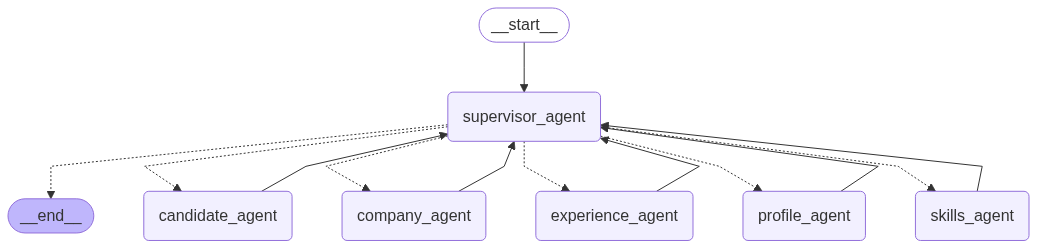

In [6]:
app = supervisor_agent.compile()

app

In [7]:
query = """Evaluate whether Owen is suitable for the Data Scientist role at TikTok."""

for step in app.stream(
  {"messages": [("human", query)]}, stream_mode="updates"
  ):
  print(step)

{'supervisor_agent': None}
{'candidate_agent': {'messages': [AIMessage(content="OWEN TAN KENG LENG\nEmail: owen.tan@u.nus.edu    Mobile: (+65)92472807\nLinkedin: www.linkedin.com/in/owentankengleng\tGithub: https://github.com/OweT1\n\neducation\nNational University of Singapore\tAug 2022 - May 2026\nBachelor of Science in Data Science and Analytics (Honours) with 2nd Major in Computer Science\n2nd Major in Computer Science\nGrade Point Average: 4.82/5.00 (Expected Honours with Highest Distinction)\nAttained Dean's List for AY2023/2024 Semester 1 & Semester 2 and Top Student for Data Structures and Algorithms\nRelevant Coursework: Data Science in Practice, Machine Learning, Information Retrieval\n\nwork experience\nDBS Bank, Data Science Intern\tMay 2025 - Aug 2025\n\nShopee, Business Analytics Intern\tJan 2025 - Apr 2025\nDeveloped a robust scoring system for detection of similar product names using Natural Language Processing techniques\nEngineered and optimised complex SQL queries to

In [ ]:
# from utils.utils import parse_docx
# import pprint

# pprint.pp(parse_docx('data/candidates/OwenTanKengLeng_Resume.docx'))

('OWEN TAN KENG LENG\n'
 'Email: owen.tan@u.nus.edu    Mobile: (+65)92472807\n'
 'Linkedin: www.linkedin.com/in/owentankengleng\tGithub: '
 'https://github.com/OweT1 \n'
 '\n'
 'education\n'
 'National University of Singapore\tAug 2022 - May 2026\n'
 'Bachelor of Science in Data Science and Analytics (Honours) with 2nd Major '
 'in Computer Science \n'
 '2nd Major in Computer Science\n'
 'Grade Point Average: 4.82/5.00 (Expected Honours with Highest Distinction)\n'
 "Attained Dean's List for AY2023/2024 Semester 1 & Semester 2 and Top Student "
 'for Data Structures and Algorithms\n'
 'Relevant Coursework: Data Science in Practice, Machine Learning, Information '
 'Retrieval\n'
 '\n'
 'work experience\n'
 'DBS Bank, Data Science Intern\tMay 2025 - Aug 2025\n'
 '\n'
 'Shopee, Business Analytics Intern\tJan 2025 - Apr 2025\n'
 'Developed a robust scoring system for detection of similar product names '
 'using Natural Language Processing techniques\n'
 'Engineered and optimised complex SQ

In [ ]:
# message_history = [
#   {
#     "role": "user",
#     "content": "Run for the following profile"
#   }
# ]

# result = app.invoke({
#   "messages": message_history
# })

: 